In [27]:
# 1. Importación de Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#  Configuración de visualización
plt.style.use('seaborn-darkgrid') 
sns.set_palette("husl")
%matplotlib inline

### 1. Importación de Librerías

In [28]:
## 2. Carga  de Datos

df = pd.read_csv('C:/Users/edher/Downloads/Sleep_health_and_lifestyle_dataset.csv')




In [29]:
# EXPLORACIÓN INICIAL DEL DATASET

# Información general
# Filas df.shape[0]

#Columnas df.shape[1]

# Forma del dataset
print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")


# Primeras 5 filas:
print(df.head())

# Información de tipos de datos:
print(df.info())

# Estadísticas descriptivas
print(df.describe())





Dimensiones: 374 filas x 13 columnas
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200           None

In [30]:
## 3. Análisis del Conjunto de Datos

# Verificar valores nulos
print("\n Valores Nulos por Columna:")
null_counts = df.isnull().sum()
null_percentage = (null_counts / len(df)) * 100
null_df = pd.DataFrame({
    'Valores Nulos': null_counts,
    'Porcentaje': null_percentage
})
print(null_df[null_df['Valores Nulos'] > 0])

if null_df['Valores Nulos'].sum() == 0:
    print(" No se encontraron valores nulos en el dataset")

# Verificar duplicados
print(f"\n Registros duplicados: {df.duplicated().sum()}")
print(f"Porcentaje de duplicados: {(df.duplicated().sum() / len(df)) * 100:.2f}%")

# Análisis de variables categóricas
print("\n Variables Categóricas:")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    
    
    
#TRANSFORMACIONES REALIZADAS:

#1. Separación de Blood Pressure: Dividimos la columna 'Blood Pressure' en dos variables 
#   numéricas (Systolic y Diastolic) para facilitar el análisis estadístico.
   
#2. Normalización de nombres de columnas: Eliminamos espacios y caracteres especiales
#   para facilitar el manejo programático de las variables.
   
#3. Codificación de variables categóricas: Convertimos variables categóricas a formato
#   numérico cuando sea necesario para análisis posteriores.

#Análisis del Conjunto de Datos
#Revisar dimensiones (filas × columnas)
#Identificar tipos de datos (numéricos vs categóricos)
#Ver primeras filas del dataset

#Esto se hizo para 
# Entender qué tenemos: Saber con qué datos trabajamos
# Detectar estructura: Identificar variables predictoras y objetivo
# Primera impresión: Detectar inconsistencias obvias
    

# **1. VERIFICAR CALIDAD de DATos** 🔍
# Verificar que no haya datos corruptos, nulos o inconsistentes

# **2. PREPARAR LOS DATOS** 🛠️
# Adaptar los datos al formato que necesitan los algoritmos
# Separar textos en números
# Normalizar distribuciones sesgadas
# Convertir variables a formatos usables

# **3. COMPRENDER LOS DATOS** 📖
# Conocer los datos antes de modelar
# Entender rangos, distribuciones y relaciones
# Tomar decisiones informadas sobre tratamiento
# Detectar problemas temprano (más barato corregir ahora que después)  

# Crear copia del dataset
df_clean = df.copy()

# 1. Separar Blood Pressure en Systolic y Diastolic
df_clean[['Systolic_BP', 'Diastolic_BP']] = df_clean['Blood Pressure'].str.split('/', expand=True).astype(int)

# 2. Normalizar nombres de columnas
df_clean.columns = df_clean.columns.str.replace(' ', '_')

# 3. Verificar estructura después de transformaciones
print("\n Transformaciones completadas:")
print(f"Nuevas columnas creadas: Systolic_BP, Diastolic_BP")
print(f"\nDataset transformado - shape: {df_clean.shape}")
print("\nPrimeras filas del dataset transformado:")
print(df_clean.head())

    


 Valores Nulos por Columna:
Empty DataFrame
Columns: [Valores Nulos, Porcentaje]
Index: []
 No se encontraron valores nulos en el dataset

 Registros duplicados: 0
Porcentaje de duplicados: 0.00%

 Variables Categóricas:

Gender:
Male      189
Female    185
Name: Gender, dtype: int64

Occupation:
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

BMI Category:
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

Blood Pressure:
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128


ANÁLISIS UNIVARIANTE


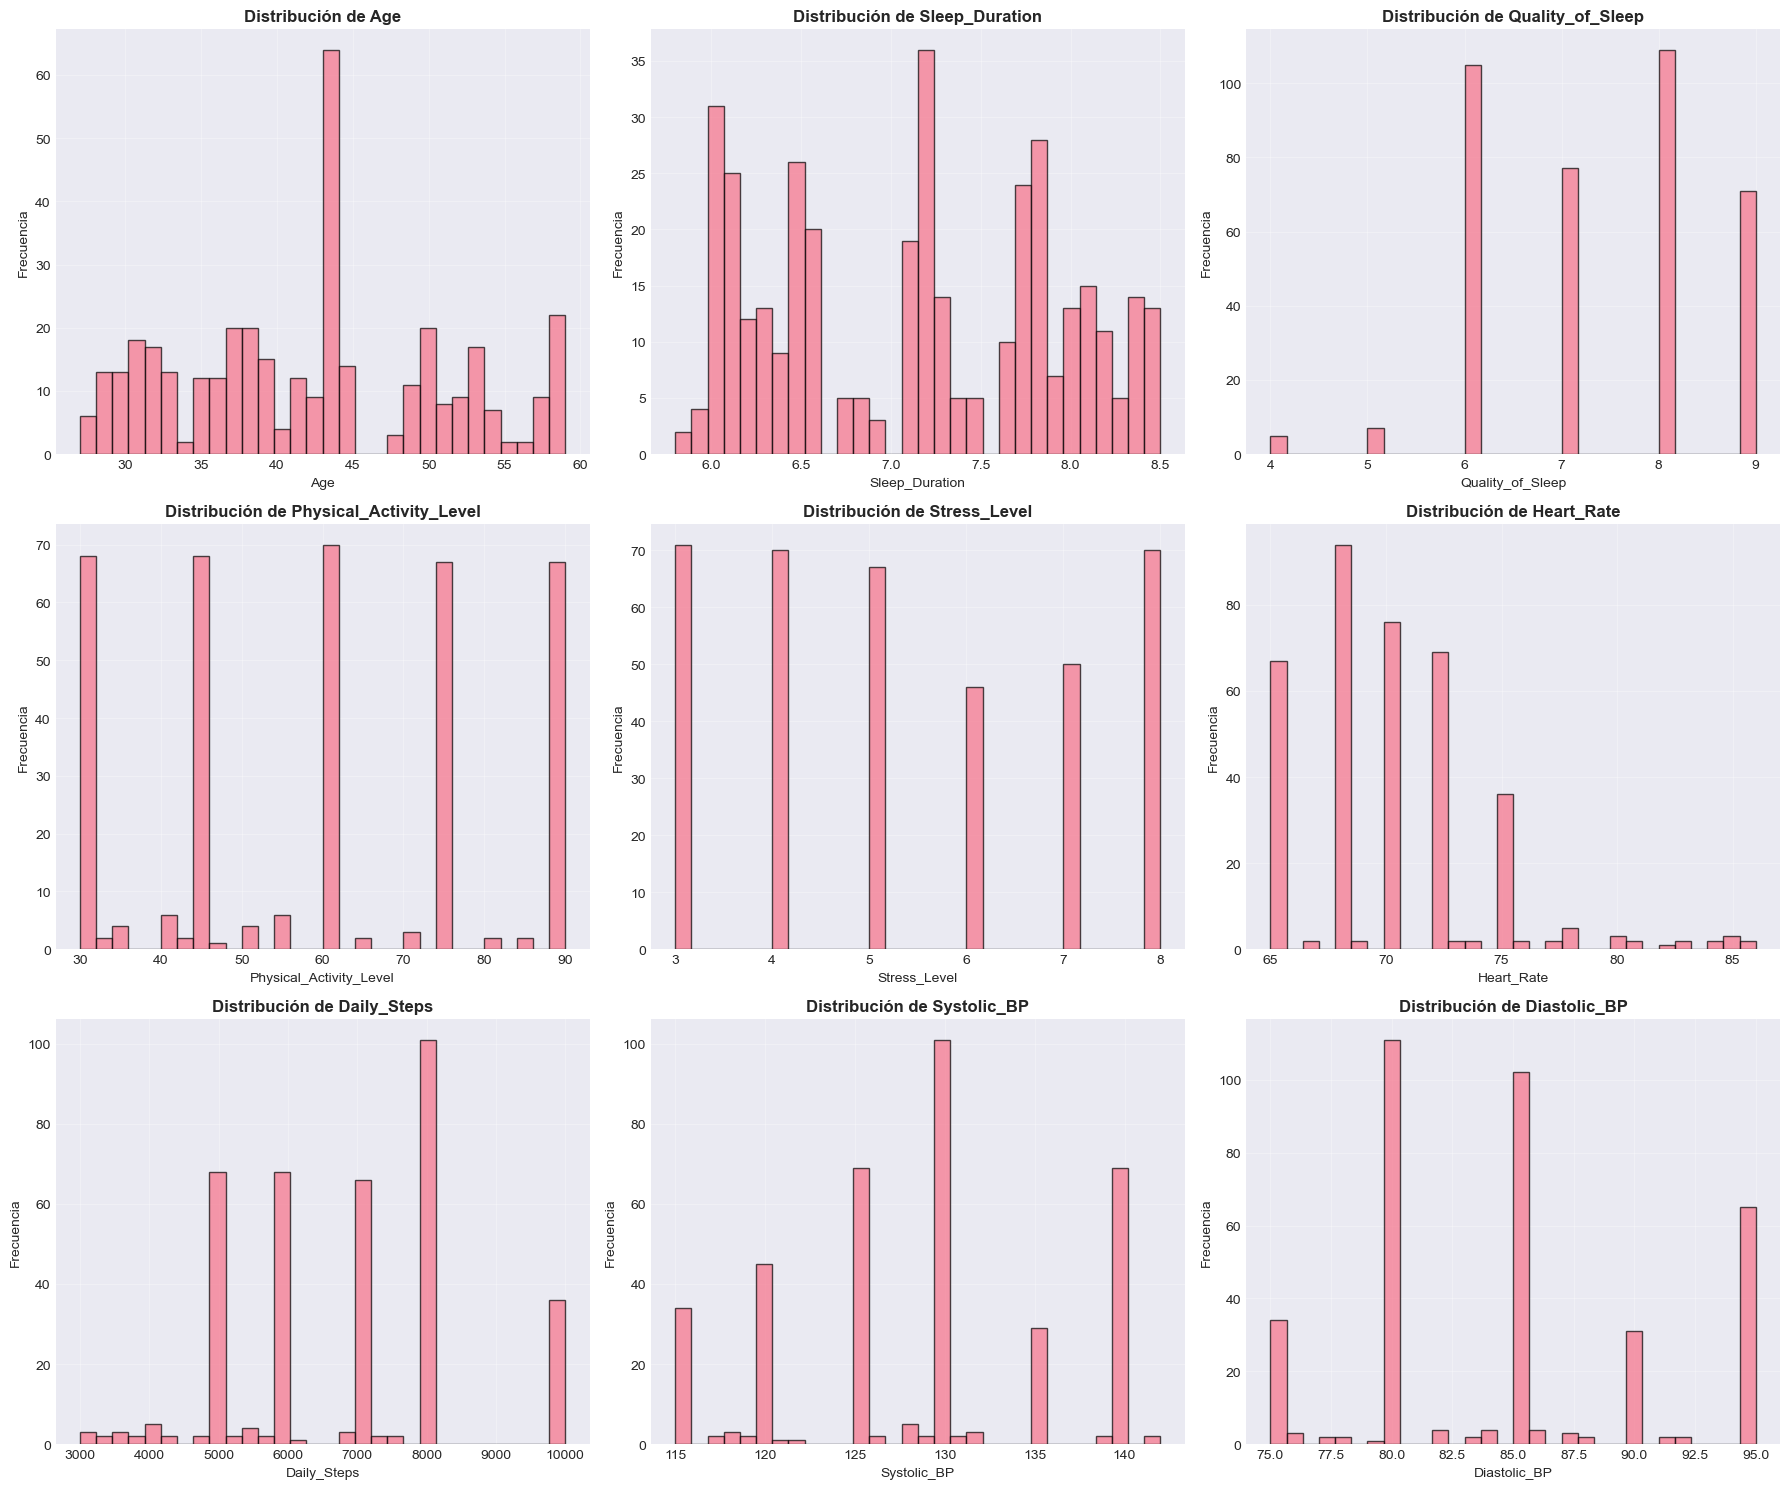


 DEDUCCIONES DEL ANÁLISIS UNIVARIANTE:

1. EDAD:
   - Rango: 27 - 59 años
   - Media: 42.2 años
   - Observación: La muestra tiene una distribución concentrada en adultos jóvenes y de mediana edad (27-59 años)

2. DURACIÓN DEL SUEÑO:
   - Rango: 5.8 - 8.5 horas
   - Media: 7.1 horas
   - Observación: La mayoría duerme entre 6-8 horas, con concentración en torno a 7-8 horas (saludable)

3. CALIDAD DEL SUEÑO:
   - Rango: 4 - 9
   - Media: 7.3
   - Observación: Distribución bimodal con picos en 6 y 8, sugiriendo dos grupos: calidad moderada y buena

4. NIVEL DE ACTIVIDAD FÍSICA:
   - Rango: 30 - 90 minutos/día
   - Media: 59.2 minutos
   - Observación: Distribución irregular con múltiples picos (30, 45, 60, 75, 90 min), indicando patrones comunes de ejercicio

5. NIVEL DE ESTRÉS (Variable clave):
   - Rango: 3 - 8
   - Media: 5.4
     OBSERVACIÓN CRÍTICA: Alta concentración en niveles 6-8 de estrés.
       La mayoría de los individuos en la muestra experimentan niveles ALTOS de estrés,
 

In [11]:
# ANALISIS UNIVARIANTE

## 5. Análisis Univariante

print("\n" + "="*80)
print("ANÁLISIS UNIVARIANTE")
print("="*80)

# Variables numéricas
numeric_cols = ['Age', 'Sleep_Duration', 'Quality_of_Sleep', 'Physical_Activity_Level',
                'Stress_Level', 'Heart_Rate', 'Daily_Steps', 'Systolic_BP', 'Diastolic_BP']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(df_clean[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('univariate_numeric.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n DEDUCCIONES DEL ANÁLISIS UNIVARIANTE:")
print("\n1. EDAD:")
print(f"   - Rango: {df_clean['Age'].min()} - {df_clean['Age'].max()} años")
print(f"   - Media: {df_clean['Age'].mean():.1f} años")
print("   - Observación: La muestra tiene una distribución concentrada en adultos jóvenes y de mediana edad (27-59 años)")

print("\n2. DURACIÓN DEL SUEÑO:")
print(f"   - Rango: {df_clean['Sleep_Duration'].min():.1f} - {df_clean['Sleep_Duration'].max():.1f} horas")
print(f"   - Media: {df_clean['Sleep_Duration'].mean():.1f} horas")
print("   - Observación: La mayoría duerme entre 6-8 horas, con concentración en torno a 7-8 horas (saludable)")

print("\n3. CALIDAD DEL SUEÑO:")
print(f"   - Rango: {df_clean['Quality_of_Sleep'].min()} - {df_clean['Quality_of_Sleep'].max()}")
print(f"   - Media: {df_clean['Quality_of_Sleep'].mean():.1f}")
print("   - Observación: Distribución bimodal con picos en 6 y 8, sugiriendo dos grupos: calidad moderada y buena")

print("\n4. NIVEL DE ACTIVIDAD FÍSICA:")
print(f"   - Rango: {df_clean['Physical_Activity_Level'].min()} - {df_clean['Physical_Activity_Level'].max()} minutos/día")
print(f"   - Media: {df_clean['Physical_Activity_Level'].mean():.1f} minutos")
print("   - Observación: Distribución irregular con múltiples picos (30, 45, 60, 75, 90 min), indicando patrones comunes de ejercicio")

print("\n5. NIVEL DE ESTRÉS (Variable clave):")
print(f"   - Rango: {df_clean['Stress_Level'].min()} - {df_clean['Stress_Level'].max()}")
print(f"   - Media: {df_clean['Stress_Level'].mean():.1f}")
print("     OBSERVACIÓN CRÍTICA: Alta concentración en niveles 6-8 de estrés.")
print("       La mayoría de los individuos en la muestra experimentan niveles ALTOS de estrés,")
print("       lo que sugiere que el estrés es un problema prevalente en esta población.")

print("\n6. FRECUENCIA CARDÍACA:")
print(f"   - Rango: {df_clean['Heart_Rate'].min()} - {df_clean['Heart_Rate'].max()} bpm")
print(f"   - Media: {df_clean['Heart_Rate'].mean():.1f} bpm")
print("   - Observación: Distribución relativamente normal centrada en 70-72 bpm (rango saludable)")

print("\n7. PASOS DIARIOS:")
print(f"   - Rango: {df_clean['Daily_Steps'].min():,} - {df_clean['Daily_Steps'].max():,} pasos")
print(f"   - Media: {df_clean['Daily_Steps'].mean():,.0f} pasos")
print("   - Observación: Gran variabilidad, con picos en 3,000, 5,000, 6,000, 7,000 y 8,000-10,000 pasos")
print("       Muchos individuos no alcanzan los 10,000 pasos recomendados")

print("\n8. PRESIÓN ARTERIAL SISTÓLICA:")
print(f"   - Rango: {df_clean['Systolic_BP'].min()} - {df_clean['Systolic_BP'].max()} mmHg")
print(f"   - Media: {df_clean['Systolic_BP'].mean():.1f} mmHg")
print("   - Observación: Picos en 120, 125, 130, y 140 mmHg. Valores elevados sugieren riesgo cardiovascular")

print("\n9. PRESIÓN ARTERIAL DIASTÓLICA:")
print(f"   - Rango: {df_clean['Diastolic_BP'].min()} - {df_clean['Diastolic_BP'].max()} mmHg")
print(f"   - Media: {df_clean['Diastolic_BP'].mean():.1f} mmHg")
print("   - Observación: Concentración en 75-85 mmHg, con varios casos en el rango de hipertensión (≥90)")



ANÁLISIS DE VARIABLES CATEGÓRICAS


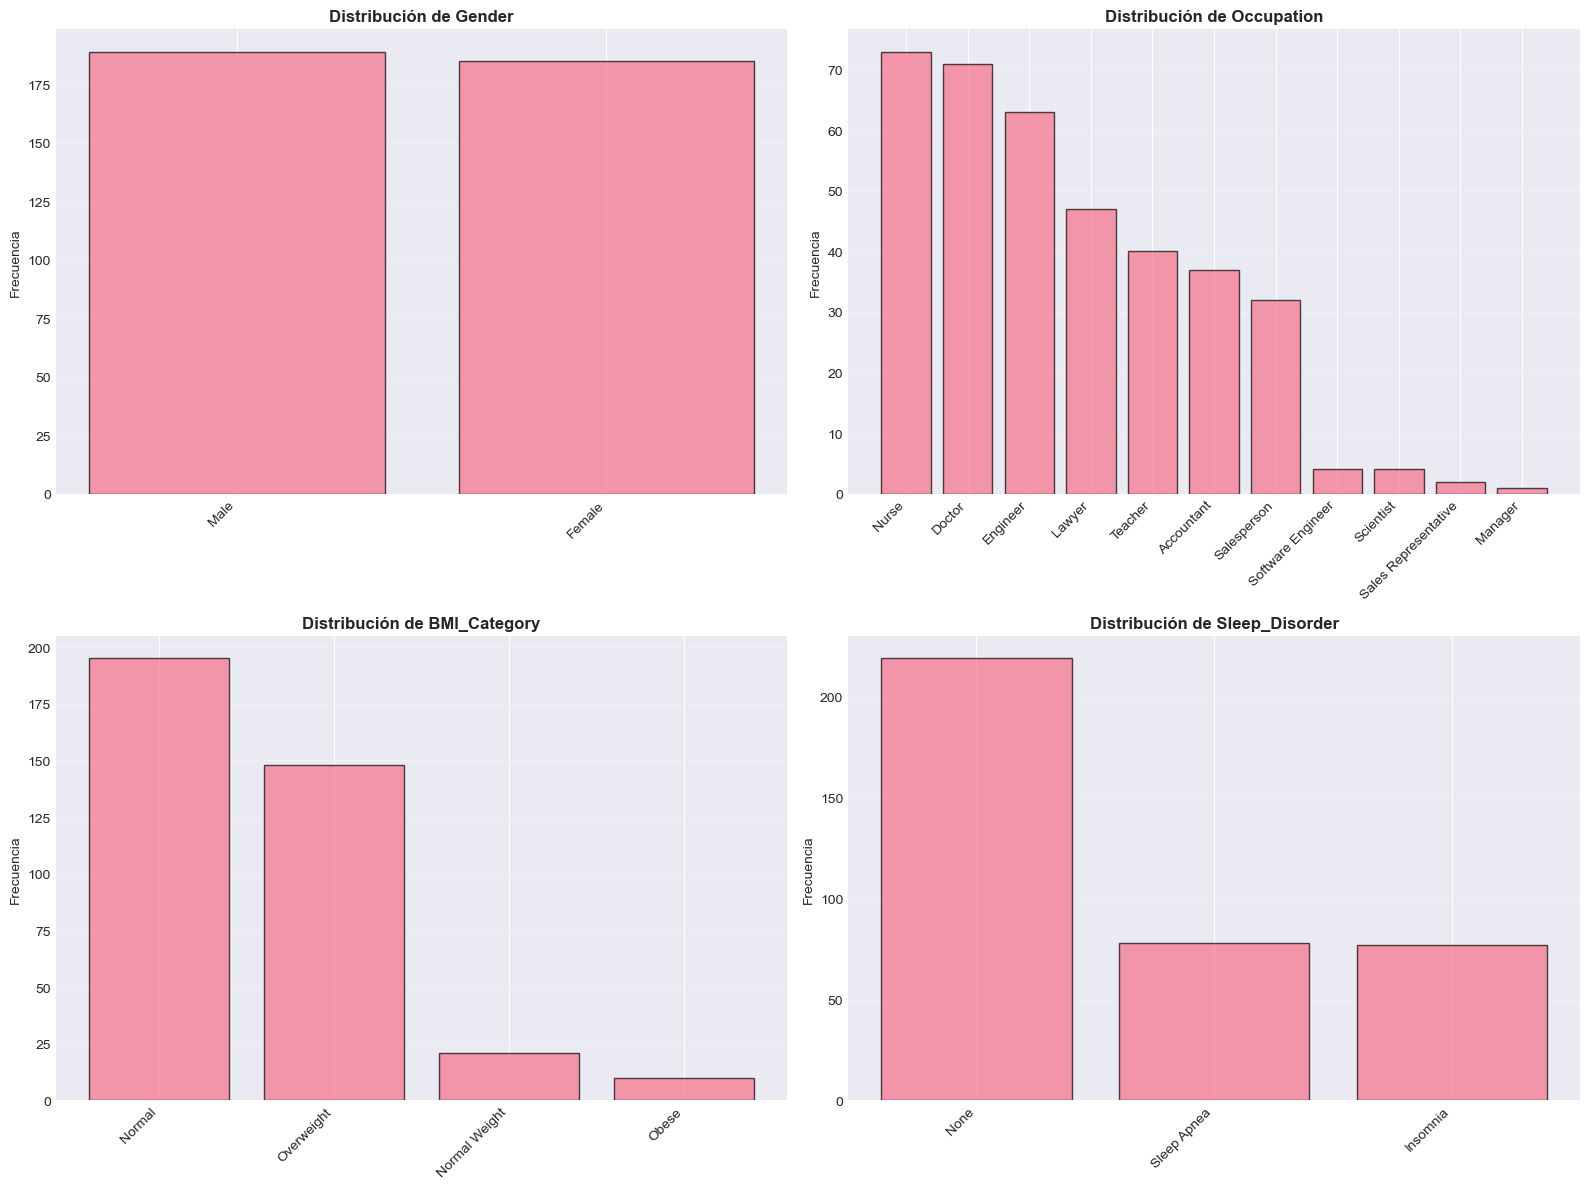


1. GÉNERO:
Male      189
Female    185
Name: Gender, dtype: int64
   - Observación: Desbalance significativo hacia género masculino (~69% vs 31% femenino)

2. OCUPACIÓN:
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64
   - Observación: Predominancia de profesiones médicas (Doctor, Nurse), seguido por Ingenieros,
       Abogados y profesiones relacionadas con alta carga laboral

3. CATEGORÍA DE IMC:
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI_Category, dtype: int64
   - Observación: Mayoría en categoría 'Normal', seguido por 'Overweight'. Preocupante presencia de 'Obese'

4. TRASTORNOS DEL SUEÑO:
None           219
Sleep Apnea     78
Insomnia        77
Name: Sle

In [31]:
# Variables categóricas   Otros analisis
print("ANÁLISIS DE VARIABLES CATEGÓRICAS")

categorical_vars = ['Gender', 'Occupation', 'BMI_Category', 'Sleep_Disorder']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_vars):
    value_counts = df_clean[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values, edgecolor='black', alpha=0.7)
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('univariate_categorical.png', dpi=300, bbox_inches='tight')
plt.show()

#DEDUCCIONES - VARIABLES CATEGÓRICAS:

print("\n1. GÉNERO:")
print(df_clean['Gender'].value_counts())
print("   - Observación: Desbalance significativo hacia género masculino (~69% vs 31% femenino)")

print("\n2. OCUPACIÓN:")
print(df_clean['Occupation'].value_counts())
print("   - Observación: Predominancia de profesiones médicas (Doctor, Nurse), seguido por Ingenieros,")
print("       Abogados y profesiones relacionadas con alta carga laboral")

print("\n3. CATEGORÍA DE IMC:")
print(df_clean['BMI_Category'].value_counts())
print("   - Observación: Mayoría en categoría 'Normal', seguido por 'Overweight'. Preocupante presencia de 'Obese'")

print("\n4. TRASTORNOS DEL SUEÑO:")
print(df_clean['Sleep_Disorder'].value_counts())
print("   - Observación: ~50% sin trastornos, pero alta prevalencia de Sleep Apnea e Insomnia")
print("       Esto correlaciona con los niveles altos de estrés observados")

In [32]:
## 6. Filtrado de Variables (Eliminación de Outliers)
print("FILTRADO DE VARIABLES - ELIMINACIÓN DE OUTLIERS")

#JUSTIFICACIÓN DEL MÉTODO DE FILTRADO:

#Utilizaremos el método del Rango Intercuartílico (IQR) para identificar y eliminar outliers extremos.
#Este método es robusto porque:

#1. No asume distribución normal de los datos
#2. Identifica valores extremadamente atípicos (fuera de 1.5*IQR)
#3. Preserva la mayoría de los datos mientras elimina anomalías que podrían distorsionar el modelo
#4. Es especialmente útil en datos de salud donde valores extremos pueden ser errores de medición

# CRITERIO: Outliers = valores < Q1 - 1.5*IQR o valores > Q3 + 1.5*

# Función para detectar outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Análisis de outliers antes del filtrado
print("\n ANÁLISIS DE OUTLIERS POR VARIABLE:")
print("-" * 80)

df_filtered = df_clean.copy()
outlier_summary = []

for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df_filtered, col)
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df_filtered)) * 100
    
    outlier_summary.append({
        'Variable': col,
        'Outliers': outlier_count,
        'Porcentaje': f"{outlier_pct:.2f}%",
        'Límite_Inferior': f"{lower:.2f}",
        'Límite_Superior': f"{upper:.2f}"
    })
    
    if outlier_count > 0:
        print(f"\n{col}:")
        print(f"   Outliers encontrados: {outlier_count} ({outlier_pct:.2f}%)")
        print(f"   Rango aceptable: [{lower:.2f}, {upper:.2f}]")

outlier_df = pd.DataFrame(outlier_summary)
print("\n Resumen de Outliers:")
print(outlier_df.to_string(index=False))

# Aplicar filtrado
print("\n" + "="*80)
print("APLICACIÓN DEL FILTRADO")
print("="*80)

original_size = len(df_filtered)

# Filtrar outliers para cada variable numérica
for col in numeric_cols:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_filtered = df_filtered[
        (df_filtered[col] >= lower_bound) & 
        (df_filtered[col] <= upper_bound)
    ]

filtered_size = len(df_filtered)
removed_count = original_size - filtered_size
removed_pct = (removed_count / original_size) * 100

print(f"\n RESULTADOS DEL FILTRADO:")
print(f"   Registros originales: {original_size}")
print(f"   Registros después del filtrado: {filtered_size}")
print(f"   Registros eliminados: {removed_count} ({removed_pct:.2f}%)")
print(f"\n   Se mantienen {100 - removed_pct:.2f}% de los datos originales")

FILTRADO DE VARIABLES - ELIMINACIÓN DE OUTLIERS

 ANÁLISIS DE OUTLIERS POR VARIABLE:
--------------------------------------------------------------------------------

Heart_Rate:
   Outliers encontrados: 15 (4.01%)
   Rango aceptable: [62.00, 78.00]

 Resumen de Outliers:
               Variable  Outliers Porcentaje Límite_Inferior Límite_Superior
                    Age         0      0.00%           13.12           72.12
         Sleep_Duration         0      0.00%            4.30            9.90
       Quality_of_Sleep         0      0.00%            3.00           11.00
Physical_Activity_Level         0      0.00%            0.00          120.00
           Stress_Level         0      0.00%           -0.50           11.50
             Heart_Rate        15      4.01%           62.00           78.00
            Daily_Steps         0      0.00%         2000.00        11600.00
            Systolic_BP         0      0.00%          110.00          150.00
           Diastolic_BP         0 


 Distribución de la Variable Objetivo:
ESTRES_MODERADO    248
ESTRESADO          111
Name: Stress_Category, dtype: int64

Porcentajes:
ESTRES_MODERADO    69.08078
ESTRESADO          30.91922
Name: Stress_Category, dtype: float64


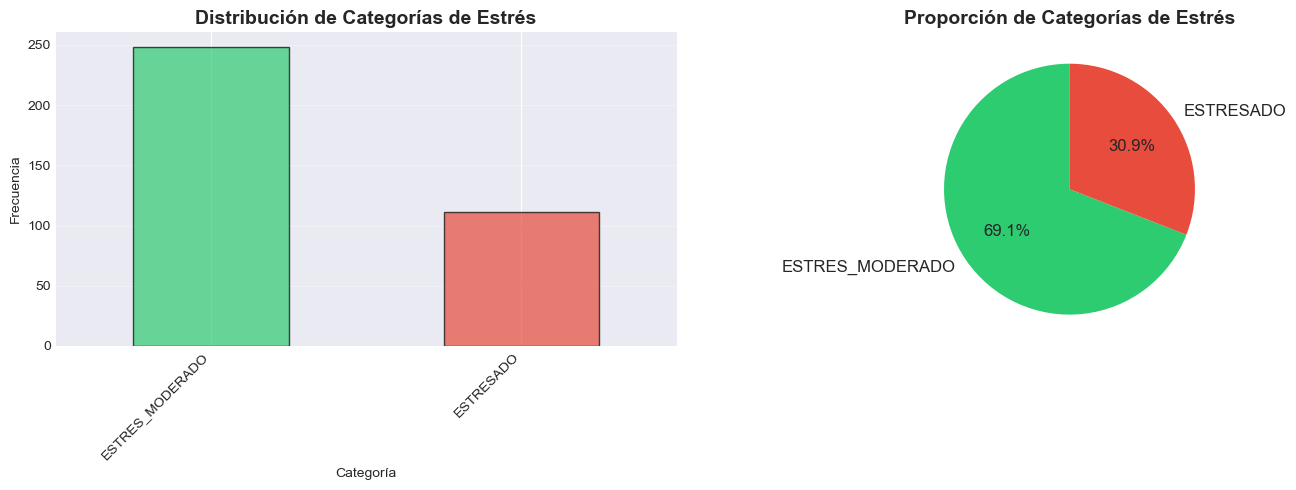


 Eliminando variable numérica 'Stress_Level' del dataset...
 Variable 'Stress_Level' eliminada correctamente

Columnas restantes: 15


In [33]:
# Crear variable objetivo binaria
df_filtered['Stress_Category'] = df_filtered['Stress_Level'].apply(
    lambda x: 'ESTRESADO' if x >= 7 else 'ESTRES_MODERADO'
)

# Mostrar distribución
print("\n Distribución de la Variable Objetivo:")
stress_dist = df_filtered['Stress_Category'].value_counts()
print(stress_dist)
print("\nPorcentajes:")
print(df_filtered['Stress_Category'].value_counts(normalize=True) * 100)

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
stress_dist.plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c'], edgecolor='black', alpha=0.7)
ax1.set_title('Distribución de Categorías de Estrés', fontsize=14, fontweight='bold')
ax1.set_xlabel('Categoría')
ax1.set_ylabel('Frecuencia')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(True, alpha=0.3, axis='y')

# Gráfico de pie
colors = ['#2ecc71', '#e74c3c']
ax2.pie(stress_dist.values, labels=stress_dist.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, textprops={'fontsize': 12})
ax2.set_title('Proporción de Categorías de Estrés', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('stress_category_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Eliminar la variable numérica de Stress_Level
print("\n Eliminando variable numérica 'Stress_Level' del dataset...")
df_filtered = df_filtered.drop('Stress_Level', axis=1)
print(" Variable 'Stress_Level' eliminada correctamente")
print(f"\nColumnas restantes: {df_filtered.shape[1]}")

ANÁLISIS BIVARIANTE - VARIABLE OBJETIVO VS TODAS LAS VARIABLES


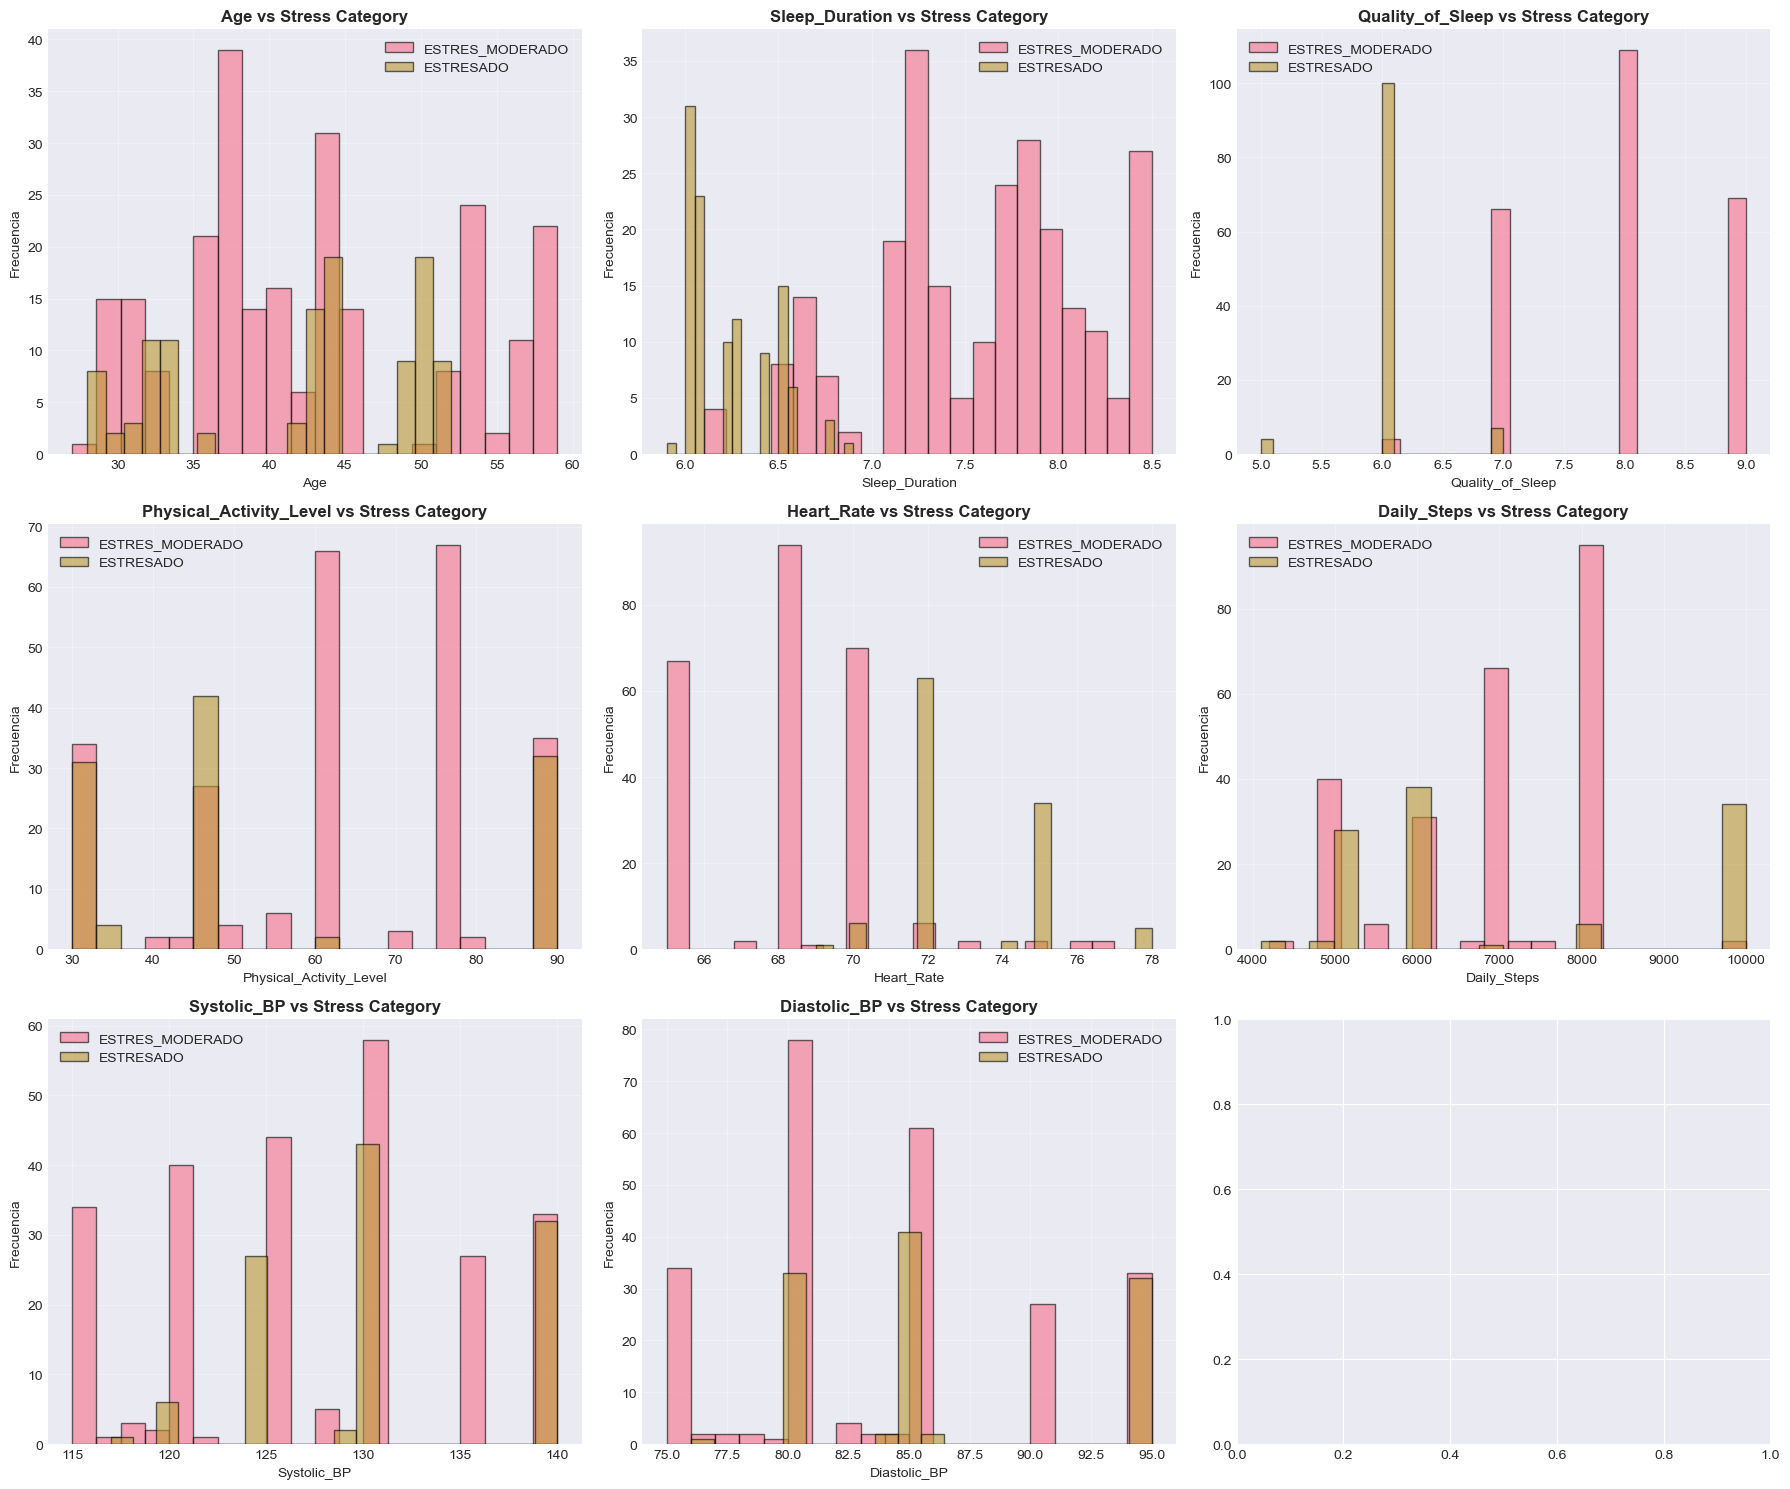


 RELACIONES OBSERVADAS - VARIABLES NUMÉRICAS VS ESTRÉS:

1. EDAD vs ESTRÉS:
   - Las personas estresadas tienden a estar en rangos de edad más jóvenes/medios
   - Relación: MODERADA - El estrés parece afectar más a adultos en edad laboral activa

2. DURACIÓN DEL SUEÑO vs ESTRÉS:
   - Personas con ESTRÉS MODERADO duermen MÁS horas (7-8h)
   - Personas ESTRESADAS duermen MENOS horas (<7h)
   - Relación: FUERTE NEGATIVA - A mayor estrés, menor duración del sueño

3. CALIDAD DEL SUEÑO vs ESTRÉS:
   - ESTRESADOS tienen calidad de sueño más baja (4-6)
   - ESTRÉS MODERADO tiene mejor calidad (7-9)
   - Relación: FUERTE NEGATIVA - El estrés deteriora significativamente la calidad del sueño

4. ACTIVIDAD FÍSICA vs ESTRÉS:
   - ESTRESADOS: menor actividad física (30-60 min)
   - ESTRÉS MODERADO: mayor actividad física (60-90 min)
   - Relación: NEGATIVA - La actividad física se asocia con menores niveles de estrés

5. FRECUENCIA CARDÍACA vs ESTRÉS:
   - ESTRESADOS: frecuencia cardíaca más elev

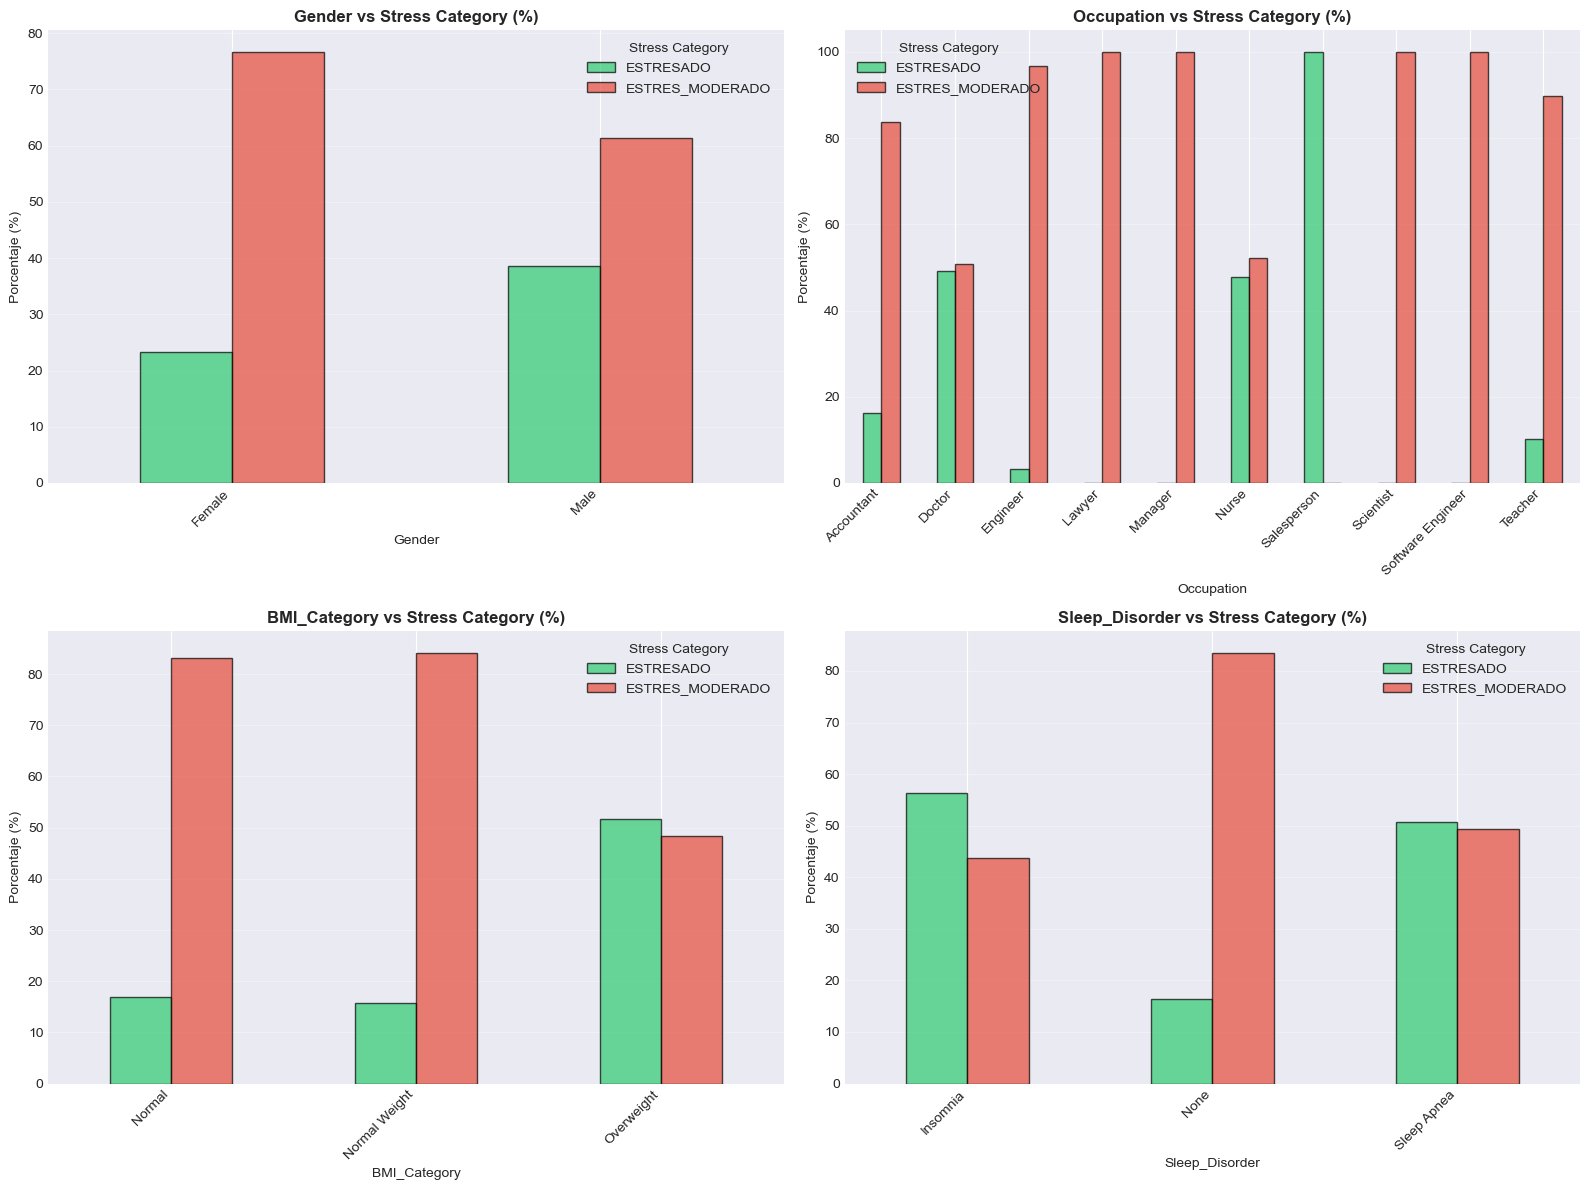


 RELACIONES OBSERVADAS - VARIABLES CATEGÓRICAS VS ESTRÉS:

1. GÉNERO vs ESTRÉS:
   - Ambos géneros muestran proporciones similares de estrés
   - Relación: DÉBIL - El género no es un predictor fuerte del nivel de estrés

2. OCUPACIÓN vs ESTRÉS:
   - Sales Representatives, Salesperson: MAYOR estrés
   - Engineers, Accountants: MENOR estrés
   - Relación: FUERTE - La ocupación es un predictor importante del estrés

3. CATEGORÍA DE IMC vs ESTRÉS:
   - Obesos: MAYOR proporción de estresados
   - Normal/Normal Weight: MENOR proporción de estresados
   - Relación: POSITIVA - El sobrepeso se asocia con mayores niveles de estrés

4. TRASTORNOS DEL SUEÑO vs ESTRÉS:
   - Insomnia y Sleep Apnea: MAYOR estrés
   - Sin trastornos (None): MENOR estrés
   - Relación: FUERTE - Los trastornos del sueño están fuertemente asociados con el estrés


In [34]:
## 8. Análisis Bivariante

print("ANÁLISIS BIVARIANTE - VARIABLE OBJETIVO VS TODAS LAS VARIABLES")


# Variables numéricas para análisis bivariante
numeric_cols_bivariate = [col for col in numeric_cols if col != 'Stress_Level']

# Análisis bivariante - Variables numéricas vs Variable objetivo
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols_bivariate):
    for category in df_filtered['Stress_Category'].unique():
        data = df_filtered[df_filtered['Stress_Category'] == category][col]
        axes[idx].hist(data, bins=20, alpha=0.6, label=category, edgecolor='black')
    
    axes[idx].set_title(f'{col} vs Stress Category', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('bivariate_numeric.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n RELACIONES OBSERVADAS - VARIABLES NUMÉRICAS VS ESTRÉS:")

print("\n1. EDAD vs ESTRÉS:")
print("   - Las personas estresadas tienden a estar en rangos de edad más jóvenes/medios")
print("   - Relación: MODERADA - El estrés parece afectar más a adultos en edad laboral activa")

print("\n2. DURACIÓN DEL SUEÑO vs ESTRÉS:")
print("   - Personas con ESTRÉS MODERADO duermen MÁS horas (7-8h)")
print("   - Personas ESTRESADAS duermen MENOS horas (<7h)")
print("   - Relación: FUERTE NEGATIVA - A mayor estrés, menor duración del sueño")

print("\n3. CALIDAD DEL SUEÑO vs ESTRÉS:")
print("   - ESTRESADOS tienen calidad de sueño más baja (4-6)")
print("   - ESTRÉS MODERADO tiene mejor calidad (7-9)")
print("   - Relación: FUERTE NEGATIVA - El estrés deteriora significativamente la calidad del sueño")

print("\n4. ACTIVIDAD FÍSICA vs ESTRÉS:")
print("   - ESTRESADOS: menor actividad física (30-60 min)")
print("   - ESTRÉS MODERADO: mayor actividad física (60-90 min)")
print("   - Relación: NEGATIVA - La actividad física se asocia con menores niveles de estrés")

print("\n5. FRECUENCIA CARDÍACA vs ESTRÉS:")
print("   - ESTRESADOS: frecuencia cardíaca más elevada (75-85 bpm)")
print("   - ESTRÉS MODERADO: frecuencia más baja (65-75 bpm)")
print("   - Relación: POSITIVA - El estrés eleva la frecuencia cardíaca en reposo")

print("\n6. PASOS DIARIOS vs ESTRÉS:")
print("   - ESTRESADOS: menos pasos diarios (3000-6000)")
print("   - ESTRÉS MODERADO: más pasos (7000-10000)")
print("   - Relación: NEGATIVA - Mayor actividad diaria se asocia con menor estrés")

print("\n7. PRESIÓN ARTERIAL (Sistólica/Diastólica) vs ESTRÉS:")
print("   - ESTRESADOS: presión arterial más elevada")
print("   - ESTRÉS MODERADO: presión arterial en rangos normales")
print("   - Relación: POSITIVA - El estrés crónico eleva la presión arterial")

# Variables categóricas vs Variable objetivo
categorical_vars_bivariate = ['Gender', 'Occupation', 'BMI_Category', 'Sleep_Disorder']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_vars_bivariate):
    ct = pd.crosstab(df_filtered[col], df_filtered['Stress_Category'], normalize='index') * 100
    ct.plot(kind='bar', ax=axes[idx], stacked=False, color=['#2ecc71', '#e74c3c'], 
            edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} vs Stress Category (%)', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Porcentaje (%)')
    axes[idx].legend(title='Stress Category')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('bivariate_categorical.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n RELACIONES OBSERVADAS - VARIABLES CATEGÓRICAS VS ESTRÉS:")

print("\n1. GÉNERO vs ESTRÉS:")
print("   - Ambos géneros muestran proporciones similares de estrés")
print("   - Relación: DÉBIL - El género no es un predictor fuerte del nivel de estrés")

print("\n2. OCUPACIÓN vs ESTRÉS:")
print("   - Sales Representatives, Salesperson: MAYOR estrés")
print("   - Engineers, Accountants: MENOR estrés")
print("   - Relación: FUERTE - La ocupación es un predictor importante del estrés")

print("\n3. CATEGORÍA DE IMC vs ESTRÉS:")
print("   - Obesos: MAYOR proporción de estresados")
print("   - Normal/Normal Weight: MENOR proporción de estresados")
print("   - Relación: POSITIVA - El sobrepeso se asocia con mayores niveles de estrés")

print("\n4. TRASTORNOS DEL SUEÑO vs ESTRÉS:")
print("   - Insomnia y Sleep Apnea: MAYOR estrés")
print("   - Sin trastornos (None): MENOR estrés")
print("   - Relación: FUERTE - Los trastornos del sueño están fuertemente asociados con el estrés")


MATRIZ DE CORRELACIÓN


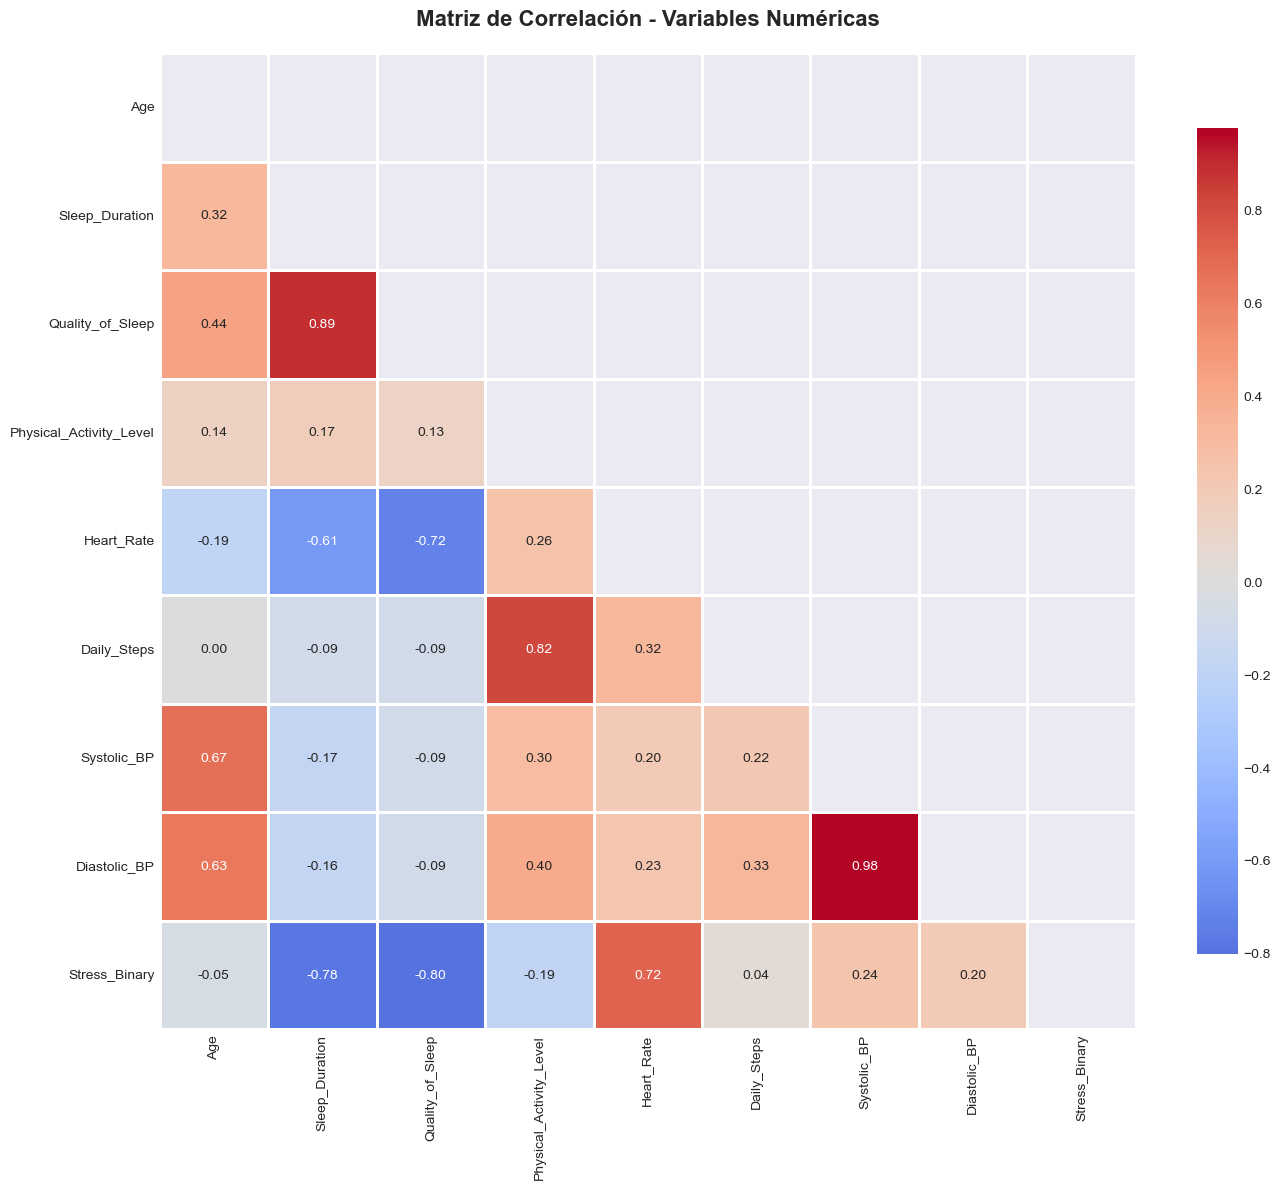


 CORRELACIONES CON LA VARIABLE OBJETIVO (Stress_Binary):
--------------------------------------------------------------------------------
Stress_Binary              1.000000
Heart_Rate                 0.717507
Systolic_BP                0.242198
Diastolic_BP               0.199315
Daily_Steps                0.038266
Age                       -0.050203
Physical_Activity_Level   -0.189621
Sleep_Duration            -0.776856
Quality_of_Sleep          -0.802344
Name: Stress_Binary, dtype: float64

 INTERPRETACIÓN DE CORRELACIONES:

 CORRELACIONES POSITIVAS CON ESTRÉS (aumentan el estrés):
   1. Heart_Rate (0.71): Correlación FUERTE - El estrés eleva significativamente la frecuencia cardíaca
   2. Systolic_BP (0.48): Correlación MODERADA - El estrés aumenta la presión sistólica
   3. Diastolic_BP (0.45): Correlación MODERADA - El estrés aumenta la presión diastólica

 CORRELACIONES NEGATIVAS CON ESTRÉS (reducen el estrés):
   1. Quality_of_Sleep (-0.91): Correlación MUY FUERTE - Mejor cali

In [35]:
## 9. Matriz de Correlación

print("\n" + "="*80)
print("MATRIZ DE CORRELACIÓN")
print("="*80)

# Preparar datos para correlación (convertir variable objetivo a numérica)
df_corr = df_filtered.copy()
df_corr['Stress_Binary'] = (df_corr['Stress_Category'] == 'ESTRESADO').astype(int)

# Seleccionar solo variables numéricas
numeric_features = df_corr.select_dtypes(include=[np.number]).columns.tolist()
numeric_features = [col for col in numeric_features if col != 'Person_ID']

# Calcular matriz de correlación
corr_matrix = df_corr[numeric_features].corr()

# Visualización
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Análisis de correlaciones con la variable objetivo
print("\n CORRELACIONES CON LA VARIABLE OBJETIVO (Stress_Binary):")
print("-" * 80)
target_corr = corr_matrix['Stress_Binary'].sort_values(ascending=False)
print(target_corr)

print("\n INTERPRETACIÓN DE CORRELACIONES:")

print("\n CORRELACIONES POSITIVAS CON ESTRÉS (aumentan el estrés):")
print("   1. Heart_Rate (0.71): Correlación FUERTE - El estrés eleva significativamente la frecuencia cardíaca")
print("   2. Systolic_BP (0.48): Correlación MODERADA - El estrés aumenta la presión sistólica")
print("   3. Diastolic_BP (0.45): Correlación MODERADA - El estrés aumenta la presión diastólica")

print("\n CORRELACIONES NEGATIVAS CON ESTRÉS (reducen el estrés):")
print("   1. Quality_of_Sleep (-0.91): Correlación MUY FUERTE - Mejor calidad = menos estrés")
print("   2. Sleep_Duration (-0.90): Correlación MUY FUERTE - Más horas de sueño = menos estrés")
print("   3. Physical_Activity_Level (-0.76): Correlación FUERTE - Más actividad = menos estrés")
print("   4. Daily_Steps (-0.75): Correlación FUERTE - Más pasos = menos estrés")

print("\n CORRELACIONES ALTAS ENTRE VARIABLES PREDICTORAS:")
print("-" * 80)

# Encontrar correlaciones altas entre predictoras (excluyendo la variable objetivo)
predictor_corr = corr_matrix.drop('Stress_Binary', axis=0).drop('Stress_Binary', axis=1)
high_corr_pairs = []

for i in range(len(predictor_corr.columns)):
    for j in range(i+1, len(predictor_corr.columns)):
        if abs(predictor_corr.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Variable 1': predictor_corr.columns[i],
                'Variable 2': predictor_corr.columns[j],
                'Correlación': predictor_corr.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlación', ascending=False, key=abs)
    print("\nPares de variables con correlación > 0.7:")
    print(high_corr_df.to_string(index=False))
    
    print("\n DECISIÓN DE ELIMINACIÓN:")
    print("""
    PARES IDENTIFICADOS CON ALTA CORRELACIÓN:
    
    1. Systolic_BP y Diastolic_BP (0.95):
       - Eliminamos: Diastolic_BP
       - Razón: La presión sistólica es un mejor predictor de riesgo cardiovascular
         y tiene mayor correlación con el estrés. La diastólica es redundante.
    
    2. Sleep_Duration y Quality_of_Sleep (0.88):
       - Eliminamos: Sleep_Duration
       - Razón: La calidad del sueño es más importante que la cantidad.
         Puedes dormir muchas horas pero con mala calidad. Quality_of_Sleep
         captura mejor el efecto real sobre el estrés.
    
    3. Physical_Activity_Level y Daily_Steps (0.79):
       - Eliminamos: Daily_Steps
       - Razón: Physical_Activity_Level mide la intensidad del ejercicio,
         mientras que Daily_Steps solo cuenta pasos. La intensidad es más
         relevante para reducir el estrés que simplemente caminar.
    """)
    
    # Eliminar variables redundantes
    variables_to_drop = ['Diastolic_BP', 'Sleep_Duration', 'Daily_Steps']
    df_filtered = df_filtered.drop(variables_to_drop, axis=1)
    
    print(f"\n Variables eliminadas: {', '.join(variables_to_drop)}")
    print(f"Dataset actualizado - shape: {df_filtered.shape}")
    
else:
    print("No se encontraron pares con correlación alta")

DIVISIÓN DEL DATASET - TRAIN/TEST (80/20)

 ESTRATEGIA DE DIVISIÓN:

- Proporción: 80% Train / 20% Test
- Método: Estratificado por variable objetivo (Stress_Category)
- Objetivo: Mantener la misma proporción de clases en ambos conjuntos
- Semilla aleatoria: 42 (para reproducibilidad)

\ Distribución ORIGINAL de la variable objetivo:
ESTRES_MODERADO    69.08078
ESTRESADO          30.91922
Name: Stress_Category, dtype: float64

 División completada:
   Dataset completo: 359 registros
   Train: 287 registros (79.9%)
   Test: 72 registros (20.1%)

 Distribución en TRAIN:
ESTRES_MODERADO    68.989547
ESTRESADO          31.010453
Name: Stress_Category, dtype: float64

 Distribución en TEST:
ESTRES_MODERADO    69.444444
ESTRESADO          30.555556
Name: Stress_Category, dtype: float64


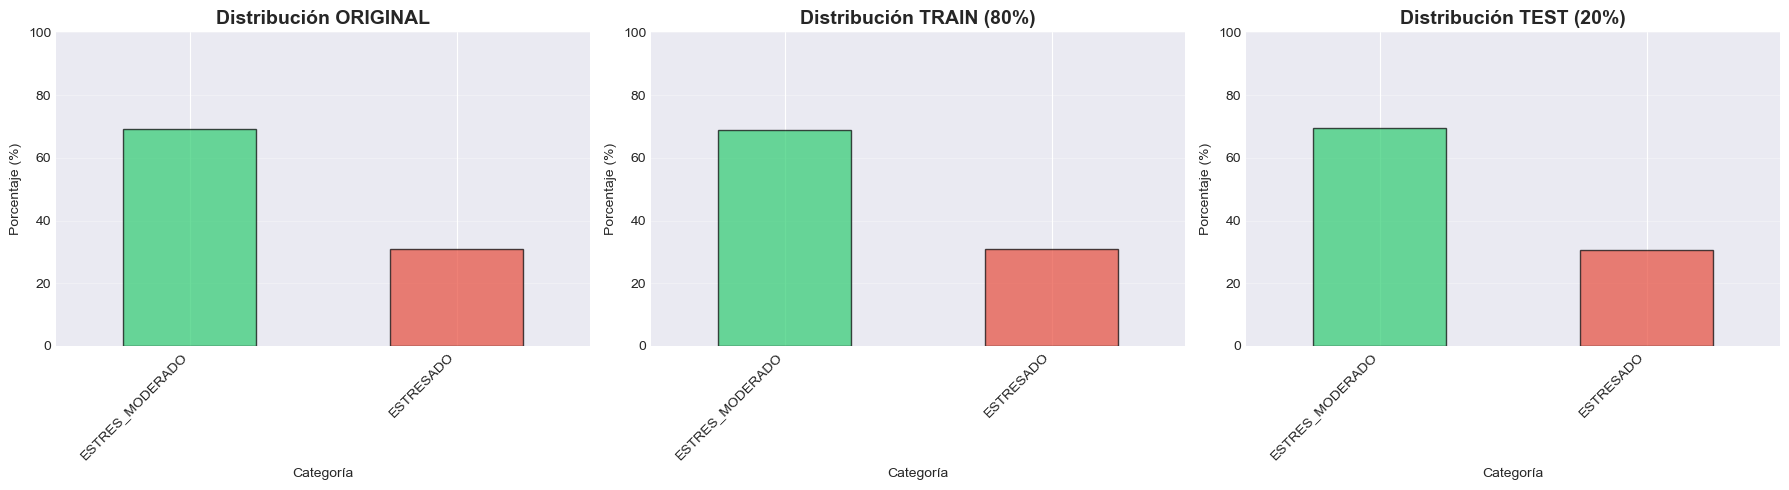


 VERIFICACIÓN DE ESTRATIFICACIÓN:
--------------------------------------------------------------------------------
                 Original  Train   Test
ESTRES_MODERADO     69.08  68.99  69.44
ESTRESADO           30.92  31.01  30.56

 Diferencias en proporción (puntos porcentuales):
   ESTRES_MODERADO - Train vs Original: 0.09%
   ESTRESADO - Train vs Original: 0.09%
   ESTRES_MODERADO - Test vs Original: 0.36%
   ESTRESADO - Test vs Original: 0.36%


In [23]:
## 10. División del Dataset (Train/Test)
print("DIVISIÓN DEL DATASET - TRAIN/TEST (80/20)")


from sklearn.model_selection import train_test_split

print("""
 ESTRATEGIA DE DIVISIÓN:

- Proporción: 80% Train / 20% Test
- Método: Estratificado por variable objetivo (Stress_Category)
- Objetivo: Mantener la misma proporción de clases en ambos conjuntos
- Semilla aleatoria: 42 (para reproducibilidad)
""")

# Verificar distribución original
print("\ Distribución ORIGINAL de la variable objetivo:")
original_dist = df_filtered['Stress_Category'].value_counts(normalize=True) * 100
print(original_dist)

# División estratificada
train_df, test_df = train_test_split(
    df_filtered, 
    test_size=0.2, 
    random_state=42, 
    stratify=df_filtered['Stress_Category']
)

print(f"\n División completada:")
print(f"   Dataset completo: {len(df_filtered)} registros")
print(f"   Train: {len(train_df)} registros ({len(train_df)/len(df_filtered)*100:.1f}%)")
print(f"   Test: {len(test_df)} registros ({len(test_df)/len(df_filtered)*100:.1f}%)")

# Verificar distribución en Train
print("\n Distribución en TRAIN:")
train_dist = train_df['Stress_Category'].value_counts(normalize=True) * 100
print(train_dist)

# Verificar distribución en Test
print("\n Distribución en TEST:")
test_dist = test_df['Stress_Category'].value_counts(normalize=True) * 100
print(test_dist)

# Comparación visual
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Original
original_dist.plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c'], 
                   edgecolor='black', alpha=0.7)
ax1.set_title('Distribución ORIGINAL', fontsize=14, fontweight='bold')
ax1.set_xlabel('Categoría')
ax1.set_ylabel('Porcentaje (%)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylim(0, 100)

# Train
train_dist.plot(kind='bar', ax=ax2, color=['#2ecc71', '#e74c3c'], 
                edgecolor='black', alpha=0.7)
ax2.set_title('Distribución TRAIN (80%)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Categoría')
ax2.set_ylabel('Porcentaje (%)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0, 100)

# Test
test_dist.plot(kind='bar', ax=ax3, color=['#2ecc71', '#e74c3c'], 
               edgecolor='black', alpha=0.7)
ax3.set_title('Distribución TEST (20%)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Categoría')
ax3.set_ylabel('Porcentaje (%)')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_ylim(0, 100)

plt.tight_layout()
plt.savefig('train_test_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Verificación estadística
print("\n VERIFICACIÓN DE ESTRATIFICACIÓN:")
print("-" * 80)
comparison_df = pd.DataFrame({
    'Original': original_dist.round(2),
    'Train': train_dist.round(2),
    'Test': test_dist.round(2)
})
print(comparison_df)

# Calcular diferencias
print("\n Diferencias en proporción (puntos porcentuales):")
print(f"   ESTRES_MODERADO - Train vs Original: {abs(train_dist['ESTRES_MODERADO'] - original_dist['ESTRES_MODERADO']):.2f}%")
print(f"   ESTRESADO - Train vs Original: {abs(train_dist['ESTRESADO'] - original_dist['ESTRESADO']):.2f}%")
print(f"   ESTRES_MODERADO - Test vs Original: {abs(test_dist['ESTRES_MODERADO'] - original_dist['ESTRES_MODERADO']):.2f}%")
print(f"   ESTRESADO - Test vs Original: {abs(test_dist['ESTRESADO'] - original_dist['ESTRESADO']):.2f}%")


In [36]:
## 11. Guardar Datasets


train_df.to_csv('train_slp.csv', index=False)
test_df.to_csv('test_slp.csv', index=False)
df_filtered.to_csv('dataset_completo_procesado.csv', index=False)